## DecisionTree 
### for continuous features

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd, numpy as np, math
matplotlib.rcParams[u'font.sans-serif'] = ['simhei']
matplotlib.rcParams['axes.unicode_minus'] = False

In [1086]:
def get_data3_alpha(ratio = 0.7):
    data = pd.read_csv('./data3.csv')
    data = data[['密度', '含糖率', '好瓜']]
    data['好瓜'] = data['好瓜'].apply(lambda x: +2 if x == '是' else 0)
    data = data.sample(frac = 1).reset_index(drop=True)
    
    data_posi = data[data.好瓜 == 2]
    data_nega = data[data.好瓜 == 0]
    data_train = data_posi[:int(len(data_posi)*ratio)].append(data_nega[:int(len(data_nega)*ratio)]).reset_index(drop=True)
    data_test = data_posi[int(len(data_posi)*ratio):].append(data_nega[int(len(data_nega)*ratio):]).reset_index(drop=True)
    
    return (data_train, data_test)

In [916]:
import random, math

def idxing(x):
    if x == 'Iris-setosa':
        return 2
    elif x == 'Iris-versicolor':
        return 2
    else:
        return 0
    
def get_data_iris(ratio = 0.7):
    data = pd.read_csv('./data_iris.csv', names=['sepal_l', 'sepal_w', 'petal_l', 'petal_w', 'type'])

    data['type'] = data['type'].apply(idxing)
    data = data[data.type != 1]

    data = data.sample(frac = 1).reset_index(drop=True)
    data_posi = data[data.type == 2].sample(frac = 1).reset_index(drop=True)
    data_nega = data[data.type == 0].sample(frac = 1).reset_index(drop=True)
    data_train = data_posi[:int(len(data_posi)*ratio)].append(data_nega[:int(len(data_nega)*ratio)]).reset_index(drop=True)
    data_test = data_posi[int(len(data_posi)*ratio):].append(data_nega[int(len(data_nega)*ratio):]).reset_index(drop=True)
    
    return (data_train, data_test)

In [943]:
class DecisionTree(object):
    def __init__(self, data_train, weights, max_dep = 1):
        self.__data_train = data_train
        self.__weights = weights
        self.__max_dep = max_dep
        self.__root = self.dfs(data_train, weights)
    
    def Entropy(self, p1):
        if p1 < 1e-6 or p1 > 1.0 - 1e-6:
            return 0.0
        else:
            return -(p1 * math.log2(p1) + (1 - p1) * math.log2(1 - p1))
    
    def Gain(self, data, weights, idx, split):
        
        l_idx, r_idx = np.where(data.iloc[:,idx] < split)[0], np.where(data.iloc[:,idx] >= split)[0]
        data_l, data_r = data.iloc[l_idx], data.iloc[r_idx]
        weights_l, weights_r = weights[l_idx], weights[r_idx]

        p1 = weights[np.where(data.iloc[:,-1] == 2)[0]].sum() / weights.sum()
        gain = self.Entropy(p1)
        
        p1_l = weights_l[np.where(data_l.iloc[:,-1] == 2)[0]].sum() / float(weights_l.sum())
        p1_r = weights_r[np.where(data_r.iloc[:,-1] == 2)[0]].sum() / float(weights_r.sum())
        gain -= weights_l.sum() / float(weights.sum()) * self.Entropy(p1_l)
        gain -= weights_r.sum() / float(weights.sum()) * self.Entropy(p1_r)
        
        return gain
    
    def get_partition(self, data, weights):
        max_gain, best_idx, best_split = 0.0, -1, 0.0
        n, m = data.shape
        for idx in range(m - 1):
            col = np.unique(np.array(data.iloc[:,idx]))
            for k in range(len(col) - 1):
                split = (col[k] + col[k + 1]) / 2
                gain = self.Gain(data, weights, idx, split)
                if gain > max_gain + 1e-6:
                    max_gain, best_idx, best_split = gain, idx, split
                
        return (best_idx, best_split)
    
    def dfs(self, data, weights, dep = 0):

        node, type_count = {}, np.bincount(data.iloc[:,-1])
        
        best_idx, split = self.get_partition(data, weights)
        if dep == self.__max_dep or best_idx == -1:
            node['type'] = np.argmax(type_count) - 1
            return node
        
        l_idx, r_idx = np.where(data.iloc[:,best_idx] < split)[0], np.where(data.iloc[:,best_idx] >= split)[0]
        if len(l_idx) < 1 or len(r_idx) < 1:
            node['type'] = np.argmax(type_count) - 1
        else:
            node['<'] = self.dfs(data.iloc[l_idx], weights[l_idx], dep + 1)
            node['>='] = self.dfs(data.iloc[r_idx], weights[r_idx], dep + 1)
            node['idx'], node['fea'], node['split'] = best_idx, data.columns[best_idx], split
            
        return node
    
    def predict(self, sample, to_output = False):
        node = self.__root.copy()
        while (True):
            if 'type' in node:
                _s, _n = sample[-1] - 1, node['type']
                if to_output == True: print ('label: {}, predict: {}'.format(_s, _n))
                return (_s, _n)
            
            elif sample[node['fea']] < node['split']:
                node = node['<']
            elif sample[node['fea']] >= node['split']:
                node = node['>=']

In [980]:
weights = np.random.random(len(data_train)); weights /= weights.sum()
dt = DecisionTree(data_train = data_train, weights = weights)

for i in range(len(data_train)):
    dt.predict(data_train.iloc[i], to_output = True)

label: 1.0, predict: 1
label: 1.0, predict: 1
label: 1.0, predict: 1
label: 1.0, predict: 1
label: 1.0, predict: 1
label: 1.0, predict: 1
label: 1.0, predict: 1
label: 1.0, predict: 1
label: 1.0, predict: 1
label: 1.0, predict: 1
label: 1.0, predict: 1
label: 1.0, predict: -1
label: 1.0, predict: 1
label: 1.0, predict: 1
label: 1.0, predict: 1
label: 1.0, predict: 1
label: 1.0, predict: 1
label: 1.0, predict: 1
label: 1.0, predict: 1
label: 1.0, predict: 1
label: 1.0, predict: 1
label: 1.0, predict: 1
label: 1.0, predict: 1
label: 1.0, predict: 1
label: 1.0, predict: 1
label: 1.0, predict: 1
label: 1.0, predict: 1
label: 1.0, predict: 1
label: 1.0, predict: 1
label: 1.0, predict: 1
label: 1.0, predict: 1
label: 1.0, predict: 1
label: 1.0, predict: 1
label: 1.0, predict: -1
label: 1.0, predict: 1
label: 1.0, predict: 1
label: 1.0, predict: 1
label: 1.0, predict: 1
label: 1.0, predict: 1
label: 1.0, predict: 1
label: 1.0, predict: 1
label: 1.0, predict: 1
label: 1.0, predict: 1
label: 1.

## AdaBoost

In [1084]:
class AdaBoost(object):
    def __init__(self, max_dep = 1, T = 20):
        self.classifiers = []
        self.classifier_weights = [] #np.zeros(T, np.float32)
        self.max_dep = max_dep
        self.T = T
        self.model_info = [] #np.zeros((T, 3), np.float32)

    def fit(self, data_train, data_test, to_output = False):
        n, m = len(data_train), len(data_test)
        weights = np.ones(n, np.float32) / float(n)
        test_matrix = np.zeros((self.T, n), np.float32)
        
        for i in range(self.T):
            dt = DecisionTree(data_train = data_train, max_dep = self.max_dep, weights = weights)
            
            label_list, pred_list = np.zeros(n), np.zeros(n)
            for j in range(n):
                label_list[j], pred_list[j] = dt.predict(data_train.iloc[j])
            
            err_ratio = weights[(pred_list != label_list)].sum() / weights.sum() + 1e-8
            if err_ratio > 0.5 - 0.01:
                test_matrix = test_matrix[:i,:]
                print ('Invalid train in iter {}\n'.format(i))
                break
            
            alpha = 0.5 * np.log((1 - err_ratio) / err_ratio)
            self.classifier_weights.append(alpha)
            train_acc, test_acc = 0.0, 0.0
            
            for j in range(n):
                train_acc += self.predict(data_train.iloc[j])
            train_acc = train_acc / float(n)
            
            for j in range(m):
                test_acc += self.predict(data_test.iloc[j])
            test_acc = test_acc / float(m)
            self.model_info.append(np.array([i, train_acc, test_acc]))
            
            if to_output == True:
                print ('In round {}, err_ratio = {}, alpha = {}'.format(i, err_ratio, alpha))
                print ('train_accuracy: {:6f}'.format(train_acc))
                print ('test_accuracy: {:6f}'.format(test_acc))
            
            weights *= np.exp(-alpha * pred_list * label_list)
            weights /= weights.sum()
        
            test_matrix[i,:] = pred_list
            self.classifiers.append(dt)

        output = np.sum((np.array(self.classifier_weights).reshape(-1,1) * test_matrix), axis = 0)
        output = np.sign(output)
        
        return np.array(self.model_info)
    
    def predict(self, sample, to_output = False):
        
        sz = len(self.classifiers)
        pred_list = np.zeros(sz, np.float32)
        for (i, dt) in enumerate(self.classifiers):
            (_, pred_list[i]) = dt.predict(sample)
        output = np.dot(np.array(self.classifier_weights)[:sz,], pred_list)
        output = np.sign(output)
            
        if to_output == True:
            print ('label = {}, output = {}'.format(sample[-1] - 1, output))
        return (abs(sample[-1] - 1 - output) < 1e-6)

In [1107]:
# np.random.seed(0)
(data_train, data_test) = get_data3_alpha()

boost = AdaBoost(T = 200)
model_info = boost.fit(data_train, data_test, to_output = True)

In round 0, err_ratio = 0.27272726105285644, alpha = 0.49041465593512124
train_accuracy: 0.000000
test_accuracy: 0.000000
In round 1, err_ratio = 0.2916666965348816, alpha = 0.4436515252143536
train_accuracy: 0.727273
test_accuracy: 0.666667
In round 2, err_ratio = 0.25840331123901367, alpha = 0.5271419815147951
train_accuracy: 0.727273
test_accuracy: 0.666667
In round 3, err_ratio = 0.35127482818199157, alpha = 0.30672012979074365
train_accuracy: 0.727273
test_accuracy: 0.833333
Invalid train in iter 4



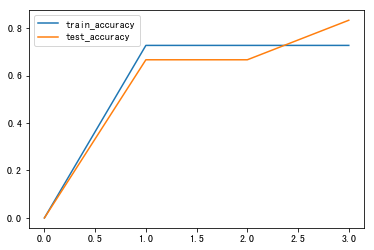

In [1108]:
plt.plot(model_info[:,0], model_info[:,1])
plt.plot(model_info[:,0], model_info[:,2])
plt.legend(['train_accuracy', 'test_accuracy'])